# Badanie właściwości ferroelektryków: 
# Opracacowanie wyników


In [18]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
def convert_to_number(series,start=0):
    return series.loc[start:].replace(to_replace=r'[,]',value='.', regex=True).astype(float)


## Parsowanie danych i przygotowanie do dalszej obróbki

In [20]:
df_const = pd.read_csv('../../data/39/data_39.csv')
df_const['t [°C]'] = convert_to_number(df_const['t [°C]'])
df_const['Xc [dz]'] = convert_to_number(df_const['Xc [dz]'])
df_const['Ys [dz]'] = convert_to_number(df_const['Ys [dz]'])
df_const['S [m^2]'] = convert_to_number(df_const['S [m^2]'])
df_const['d [m]'] = convert_to_number(df_const['d [m]'])
series = [df_const['t [°C]'], df_const['Xc [dz]'], df_const['Ys [dz]'] ]
df_var = pd.DataFrame().join(series, how='outer')
for s in series:
    df_const = df_const.drop(s.name,axis=1)
df_const = df_const.dropna()
df_const

,R1 [Ω],R2 [Ω],S [m^2],d [m],C_0 [mF],α1 [V],α2 [mV]
0,3800000.0,26000.0,1.160000e-09,0.0022,1.0,5.0,20.0


In [21]:
df_var['T [K]'] = df_var['t [°C]']+ 274.15
df_var.head()


,t [°C],Xc [dz],Ys [dz],T [K]
0,28.1,4.0,4.0,302.25
1,30.1,4.0,4.0,304.25
2,32.1,4.0,4.0,306.25
3,36.0,3.0,3.0,310.15
4,38.2,3.0,3.0,312.35


## Wyliczanie E<sub>c</sub> oraz P<sub>s


In [28]:
df_const['α2 [V]'] = df_const['α2 [mV]'] / 1000
const =( df_const['R1 [Ω]'] + df_const['R2 [Ω]'])/(df_const['α2 [V]']*df_const['R2 [Ω]']*df_const['d [m]'])
const = const[0]
df_var['E_c [V/m]'] = df_var['Xc [dz]'] * const

0     1.337762e+07
1     1.337762e+07
2     1.337762e+07
3     1.003322e+07
4     1.003322e+07
5     1.003322e+07
6     1.003322e+07
7     6.688811e+06
8     6.688811e+06
9     6.688811e+06
10    6.688811e+06
11    3.344406e+06
12    0.000000e+00
13    0.000000e+00
Name: E_c [V/m], dtype: float64

In [31]:
const = (df_const['C_0 [mF]']/1000)/(df_const['S [m^2]'] * df_const['α1 [V]'])
const = const[0]
df_var['P_s C/m^2'] = df_var['Ys [dz]']*const

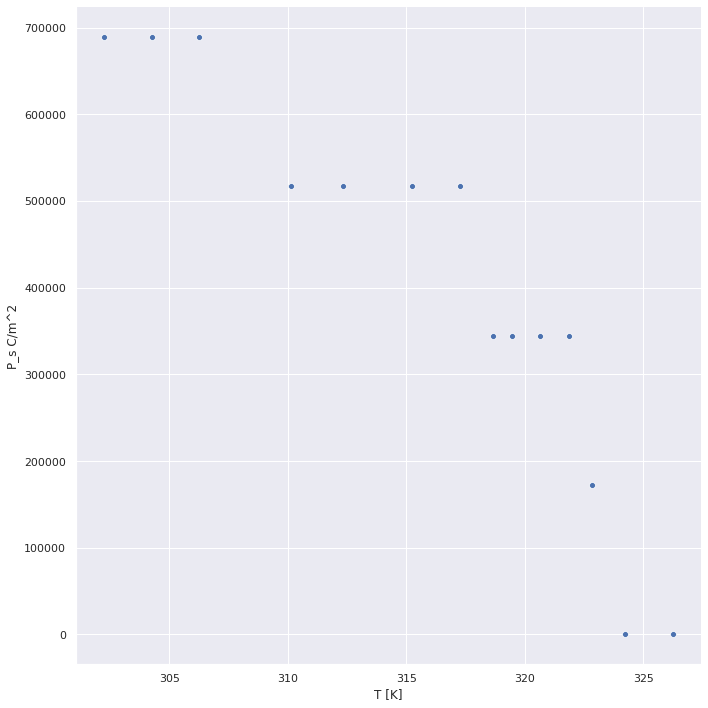

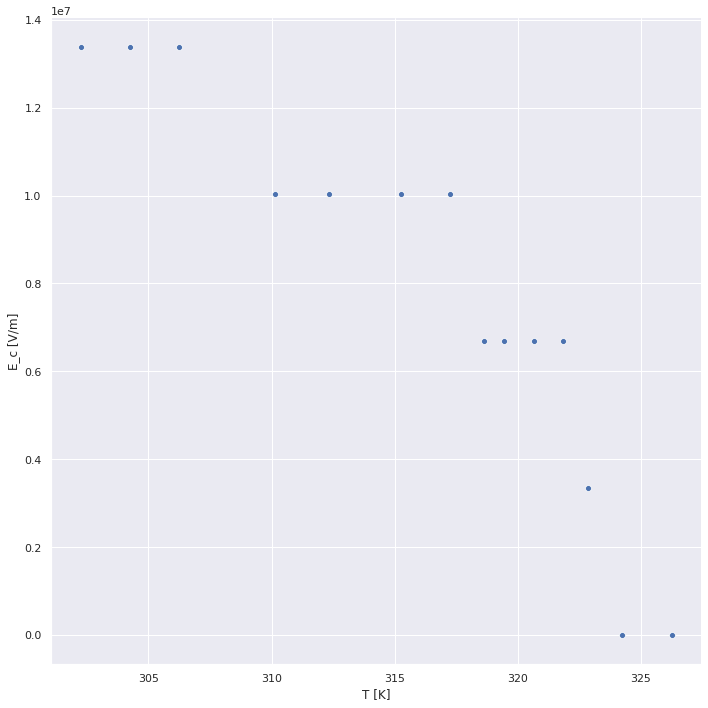

In [35]:
sns.relplot(y='P_s C/m^2', x='T [K]', data=df_var, height=10)

